<h2>Crop EDA and Cleaning</h2>
<h3>By Gilles, Asir & Arthur</h3>


##### In this notebook, you can find all the **data exploration** and **cleaning** we did on the **crop** dataset.

<h3>1.2 The crop dataset</h3>

##### First of all, we install all the neccesary libraries in our virtual environment.

In [16]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install xlrd
%pip install openpyxl
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

##### Now, we will import our xlsx dataset. Let's load the cropstats (second excel sheet). We can do this by adding the variable "sheet_name=1" to our pd.read_excel line. 
##### Let's also print our first 10 lines to make sure the data is loaded correctly.

In [18]:
crop_data = pd.read_excel("../4. Other/4.1 Datasets/Crop/Crop.xlsx", sheet_name=1)
crop_data.head(10)

,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.37,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.36,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.35,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.18,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.37,NaN,NaN


##### Let's print the statistics of all the columns.

In [19]:
crop_data.describe()

,Unnamed: 0,Harvest_year,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2
count,36707.000000,36707.000000,3.508400e+04,3.470900e+04,36707.000000,34694.000000,0.0
mean,18353.000000,1954.416760,6.415462e+05,1.542239e+06,1954.402566,2.659986,NaN
std,10596.542502,39.055266,1.555087e+06,4.904090e+06,39.051385,2.229322,NaN
min,0.000000,1861.000000,0.000000e+00,0.000000e+00,1861.000000,0.053289,NaN
25%,9176.500000,1925.000000,2.913696e+04,5.568256e+04,1925.000000,1.124418,NaN
50%,18353.000000,1957.000000,1.620035e+05,2.942249e+05,1957.000000,1.851355,NaN
75%,27529.500000,1987.000000,6.110668e+05,1.153222e+06,1987.000000,3.439073,NaN
max,36706.000000,2019.000000,3.147000e+07,1.342875e+08,2019.000000,17.168477,NaN


##### Now, let's see the data types of our dataset.

In [20]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36707 non-null  int64  
 1   Harvest_year         36707 non-null  int64  
 2   admin0               36707 non-null  object 
 3   admin1               33716 non-null  object 
 4   crop                 36707 non-null  object 
 5   hectares (ha)        35084 non-null  float64
 6   production (tonnes)  34709 non-null  float64
 7   year                 36707 non-null  int64  
 8   yield(tonnes/ha)     34694 non-null  float64
 9   admin2               0 non-null      float64
 10  notes                5641 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


##### Let's drop the columns we don't need

In [21]:
crop_data.drop(['admin2', 'notes'], axis=1, inplace=True)

In [22]:
print(crop_data.columns)

Index(['Unnamed: 0', 'Harvest_year', 'admin0', 'admin1', 'crop',
       'hectares (ha)', 'production (tonnes)', 'year', 'yield(tonnes/ha)'],
      dtype='object')


##### Let's change the names of the columns now to make them more clear.

In [23]:
crop_data.columns = ["index","Harvest_year","country","state","crop","hectares","production","year","yield"]

##### Now, let's print our colums

In [24]:
print(crop_data.columns)

Index(['index', 'Harvest_year', 'country', 'state', 'crop', 'hectares',
       'production', 'year', 'yield'],
      dtype='object')


##### Now, let's construct a correlation matrix.

In [25]:
#ignoringing the index column
#by selecting the columns from the second one (index 1) to the last one (index -1)
selected_columns = crop_data.iloc[:, 1:]

# Computing the correlation matrix
corr_matrix = selected_columns.corr(numeric_only=True)

# heatmap with plotly
fig = px.imshow(
    corr_matrix, 
    color_continuous_scale='Blues', 
    labels=dict(color='Correlation'),
    width=500)
fig.show()

##### Now, let's explore wheat production growth all over the world.

In [29]:
# Filter for years from 1901 to 2017
df_wheat_year = crop_data[(crop_data["year"] >= 1901) & (crop_data["year"] <= 2017)]

# Group by year and summing up the production
df_wheat_year = df_wheat_year.groupby('year', as_index=False).sum()

# Plotting the line plot
fig = px.line(
    df_wheat_year, 
    x="year", 
    y="production", 
    title="Year by Year Worldwide Wheat Production Growth",
    width=500)

fig.show()

C:\Users\asirf\AppData\Local\Temp\ipykernel_5328\2669667876.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#####  Now, let's change the letters to numbers so our model can work with it fluently. First we will label encode the crops. 

In [30]:
filter_wheat = (crop_data["crop"] == "wheat")
crop_data.loc[filter_wheat,"crop"] = 1
filter_cereals = (crop_data["crop"] == "cereals'")
crop_data.loc[filter_cereals,"crop"] = 2
filter_maize = (crop_data["crop"] == "maize")
crop_data.loc[filter_maize,"crop"] = 3
filter_sp_wheat = (crop_data["crop"] == "spring wheat")
crop_data.loc[filter_sp_wheat,"crop"] = 4
filter_winter_wheat = (crop_data["crop"] == "winter wheat")
crop_data.loc[filter_winter_wheat,"crop"] = 5

##### Let's find out if it worked by printing out the first 10 rows.

In [31]:
crop_data.head(10)

,index,Harvest_year,country,state,crop,hectares,production,year,yield
0,0,1902,Austria,NaN,1,NaN,NaN,1902,1.31
1,1,1903,Austria,NaN,1,NaN,NaN,1903,1.47
2,2,1904,Austria,NaN,1,NaN,NaN,1904,1.27
3,3,1905,Austria,NaN,1,NaN,NaN,1905,1.33
4,4,1906,Austria,NaN,1,NaN,NaN,1906,1.28
5,5,1907,Austria,NaN,1,NaN,NaN,1907,1.37
6,6,1908,Austria,NaN,1,NaN,NaN,1908,1.36
7,7,1909,Austria,NaN,1,NaN,NaN,1909,1.35
8,8,1910,Austria,NaN,1,NaN,NaN,1910,1.18
9,9,1911,Austria,NaN,1,NaN,NaN,1911,1.37


##### Checking null values, removing them and then checking again

In [32]:
crop_data.isnull().sum()

index              0
Harvest_year       0
country            0
state           2991
crop               0
hectares        1623
production      1998
year               0
yield           2013
dtype: int64

In [33]:
crop_data.dropna(inplace=True)

In [34]:
crop_data.isnull().sum()

index           0
Harvest_year    0
country         0
state           0
crop            0
hectares        0
production      0
year            0
yield           0
dtype: int64

In [35]:
crop_data.describe()

,index,Harvest_year,hectares,production,year,yield
count,31477.000000,31477.000000,3.147700e+04,3.147700e+04,31477.000000,31477.000000
mean,18747.740255,1955.427709,5.074756e+05,1.376355e+06,1955.427709,2.683439
std,9945.459727,39.077905,9.361399e+05,4.304644e+06,39.077905,2.242563
min,575.000000,1861.000000,1.000000e+00,1.000000e+00,1861.000000,0.053289
25%,10211.000000,1926.000000,3.235900e+04,6.268220e+04,1926.000000,1.143275
50%,18858.000000,1959.000000,1.593000e+05,2.980623e+05,1959.000000,1.864642
75%,26735.000000,1988.000000,5.665520e+05,1.110293e+06,1988.000000,3.452293
max,36706.000000,2018.000000,2.023036e+07,1.342875e+08,2018.000000,17.168477


In [36]:
crop_data

,index,Harvest_year,country,state,crop,hectares,production,year,yield
575,575,1922,Indonesia,Java (and Madura),3,1573000.0,1580000.0,1922,1.004450
576,576,1923,Indonesia,Java (and Madura),3,1630000.0,1547000.0,1923,0.949080
577,577,1924,Indonesia,Java (and Madura),3,1763000.0,1721000.0,1924,0.976177
578,578,1925,Indonesia,Java (and Madura),3,1598000.0,1659000.0,1925,1.038173
579,579,1926,Indonesia,Java (and Madura),3,1962000.0,2042000.0,1926,1.040775
...,...,...,...,...,...,...,...,...,...
36702,36702,2013,China,zhejiang,1,75520.0,278300.0,2013,3.685117
36703,36703,2014,China,zhejiang,1,82120.0,309500.0,2014,3.768875
36704,36704,2015,China,zhejiang,1,89800.0,351300.0,2015,3.912027
36705,36705,2016,China,zhejiang,1,76590.0,253900.0,2016,3.315054


##### Dropping some more tables that we don't need. 

In [37]:
crop_data.drop(columns=["country","state","Harvest_year"], inplace=True)

##### Checking our final dataset

In [38]:
crop_data

,index,crop,hectares,production,year,yield
575,575,3,1573000.0,1580000.0,1922,1.004450
576,576,3,1630000.0,1547000.0,1923,0.949080
577,577,3,1763000.0,1721000.0,1924,0.976177
578,578,3,1598000.0,1659000.0,1925,1.038173
579,579,3,1962000.0,2042000.0,1926,1.040775
...,...,...,...,...,...,...
36702,36702,1,75520.0,278300.0,2013,3.685117
36703,36703,1,82120.0,309500.0,2014,3.768875
36704,36704,1,89800.0,351300.0,2015,3.912027
36705,36705,1,76590.0,253900.0,2016,3.315054


In [39]:
crop_data.reset_index(drop=True, inplace=True)

In [40]:
crop_data

,index,crop,hectares,production,year,yield
0,575,3,1573000.0,1580000.0,1922,1.004450
1,576,3,1630000.0,1547000.0,1923,0.949080
2,577,3,1763000.0,1721000.0,1924,0.976177
3,578,3,1598000.0,1659000.0,1925,1.038173
4,579,3,1962000.0,2042000.0,1926,1.040775
...,...,...,...,...,...,...
31472,36702,1,75520.0,278300.0,2013,3.685117
31473,36703,1,82120.0,309500.0,2014,3.768875
31474,36704,1,89800.0,351300.0,2015,3.912027
31475,36705,1,76590.0,253900.0,2016,3.315054


##### Let's export our cleaned dataset to a csv file.

In [ ]:
crop_data.to_csv("../4. Other/4.1 Datasets/Crop/Crop cleaned_2.csv")

##### Checking the saved csv file

In [41]:
dataset = pd.read_csv("../4. Other/4.1 Datasets/Crop/Crop cleaned_2.csv",delimiter=',')

In [42]:
dataset

,Unnamed: 0,index,crop,hectares,production,year,yield
0,0,0,wheat,NaN,NaN,1902,1.310000
1,1,1,wheat,NaN,NaN,1903,1.470000
2,2,2,wheat,NaN,NaN,1904,1.270000
3,3,3,wheat,NaN,NaN,1905,1.330000
4,4,4,wheat,NaN,NaN,1906,1.280000
...,...,...,...,...,...,...,...
36702,36702,36702,wheat,75520.0,278300.0,2013,3.685117
36703,36703,36703,wheat,82120.0,309500.0,2014,3.768875
36704,36704,36704,wheat,89800.0,351300.0,2015,3.912027
36705,36705,36705,wheat,76590.0,253900.0,2016,3.315054


##### Let's see the production of crops all over the year

In [43]:
sample_data = dataset[(dataset["year"] >= 2010) & (dataset["year"] <= 2017)]

aggregated_data = sample_data.groupby("year")["production"].sum().reset_index()


## In this code, we first filter the dataset to include only the records for the years 2000 to 2005. Then, we use the groupby function to group the data by year and calculate the sum of production for each year. Finally, we plot the aggregated data to create a line graph. This approach accounts for duplicate years by summing up the production values for each year within the specified range.
years = np.array(aggregated_data["year"])
productions = np.array(aggregated_data["production"])

* this code filters a dataset, aggregates data by year, and then creates a line plot to visualize the production data from 2010 to 2017 while customizing the y-axis label format for better readability. The resulting plot should display the trend of production over these years.

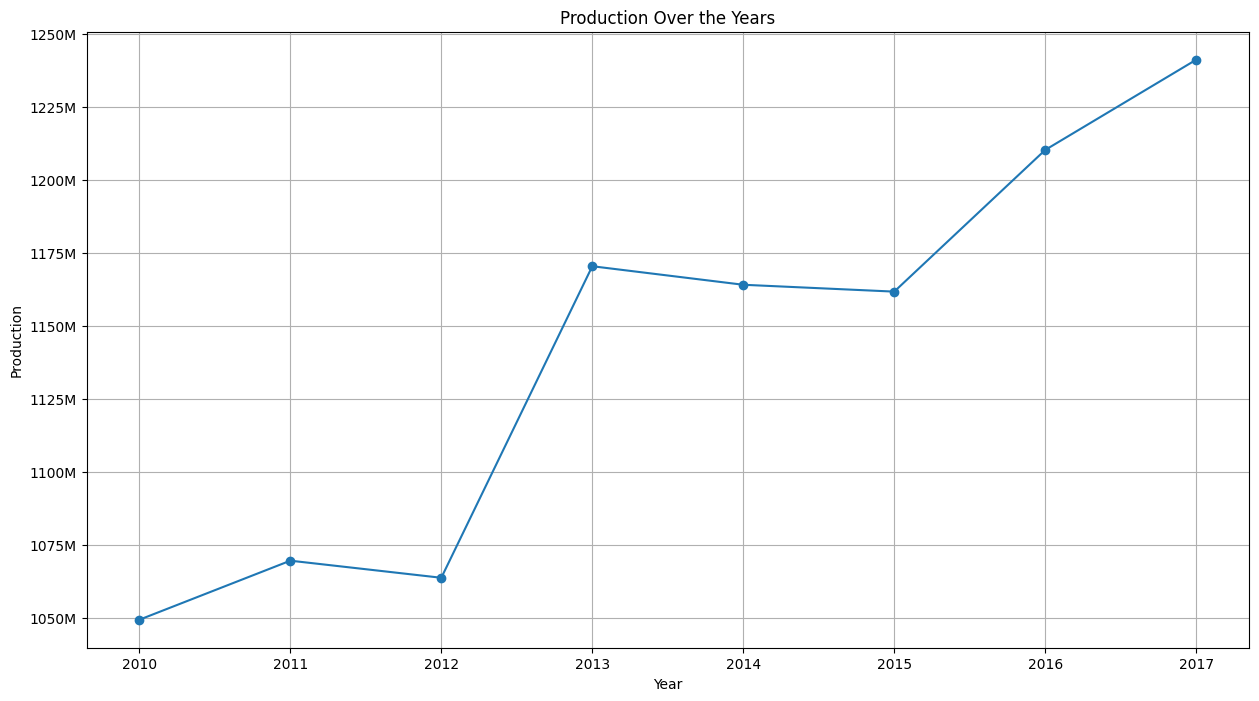

In [44]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(15, 8))  # You can adjust the figure size as needed
plt.plot(years, productions, marker='o', linestyle='-')
plt.title('Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')

# Define a custom tick format function to format values in thousands
def custom_format(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.0f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}k'
    else:
        return f'{x:.0f}'

# Apply the custom format to the y-axis
formatter = FuncFormatter(custom_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)

# Display the graph (you can also save it to a file if needed)
plt.show()